In [1]:
import jax.numpy as jnp
from jax import random
from melvin.laplace import LaplaceApproximation
import jax
import matplotlib.pylab as plt
from functools import partial

jax.config.update("jax_enable_x64", True)

In [2]:
SEED = random.PRNGKey(220)

MU = 0.3
APB = 10

ALPHA = MU * APB
BETA = (1.0 - MU) * APB

In [3]:
class BetaPosteriorOptimizer(LaplaceApproximation):
    param_bounds = [(0.0, 1.0)]

    def model(self, params, X):
        return None

    def posterior_log_prob(self, params, y, y_pred):
        return jax.scipy.stats.beta.logpdf(x=params[0], a=ALPHA, b=BETA)

initial_params = jnp.array([0.5])

model = BetaPosteriorOptimizer(
    name="Beta Posterior Optimizer",
    initial_params=initial_params,
    use_jax_minimize=False
)
model.fit(X=None, y=None)
print(model)

Laplace Approximation: Beta Posterior Optimizer
Fixed Parameters: None
Fit converged successfully
Fitted Parameters: 
	 0.2500002248973315 +/- 0.15309315483089667	 [Lower Bound = 0.0]	 [Upper Bound = 1.0]
Log Posterior Prob = 1.030747930559878


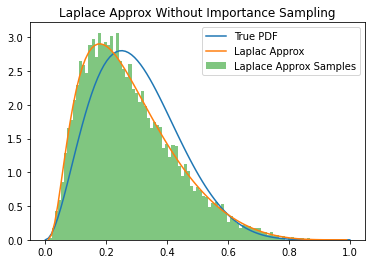

In [6]:
x = jnp.linspace(0.0, 1.0, 100)
y = jax.scipy.stats.beta.pdf(x=x, a=ALPHA, b=BETA)

laplace_logpdf_vec = jax.vmap(model._laplace_logpdf)
y_approx = jnp.exp(laplace_logpdf_vec(x.reshape(-1,1)).reshape(-1))

SEED, _seed = random.split(SEED)

samples = model.sample_params(prng_key=_seed, n_samples=10000).reshape(-1)

plt.plot(x,y,label="True PDF")
plt.plot(x,y_approx, label="Laplac Approx")
plt.hist(samples, bins=x, density=True, label="Laplace Approx Samples", alpha=0.6)
plt.title("Laplace Approx Without Importance Sampling")
plt.legend()
plt.show()

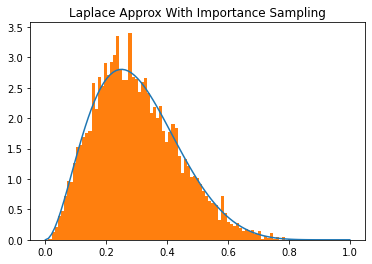

In [10]:
importance_samples = model.sample_params(prng_key=_seed, n_samples=10000, use_importance_sampling=True).reshape(-1)

plt.plot(x,y, label="True PDF")
plt.hist(importance_samples, bins=x, density=True, label="Importance-Laplace Approx Samples")
plt.title("Laplace Approx With Importance Sampling")
plt.show()